# **Tutorial on the Applications of EigenValues and EigenVectors in Machine Learning**

Eigenvalues and eigenvectors are at the heart of many machine learning algorithms, and they play a critical role in analysing and manipulating data. In essence, they describe the underlying qualities of changes inside a dataset, allowing us to identify critical patterns, minimise dimensionality, and comprehend the key attributes required for model creation. These mathematical concepts not only provide a lens through which we can comprehend complex data structures, but they also serve as the foundation for techniques such as Principal Component Analysis (PCA), spectral clustering, and feature extraction, significantly influencing the efficacy and performance of various machine learning models. Exploring the relevance of eigenvalues and eigenvectors reveals their significance as powerful tools that unlock deeper insights and permit complex studies in the area of machine learning.

Before we dwelve into the applications its is imperative to understant the basic concepts.

## **What are EigenValues and EigenVectors ??**

In plain and simple words, **EigenVectors** are vectors that, when transformed, still point in the same direction, although they might change in length, and that very **factor by which the length is scaled is the EigenValue**.

One needs to visualise a **Matrix as a kind of a Linear Transformation**. Think of **a vector and its Span**. **EigenVectors can be thought of as a class of vectors which don't get
knocked off their Span when a Linear Transformation 'A' is applied to it**, rather they are just **scaled by a factor of the EigenValue**. I would really suggest watching [this](https://www.youtube.com/watch?v=PFDu9oVAE-g) amazing video by [3Blue1Brown](https://www.youtube.com/@3blue1brown) on Youtube, which is prolly one of the best explanations that i have come across.

<p align="center">
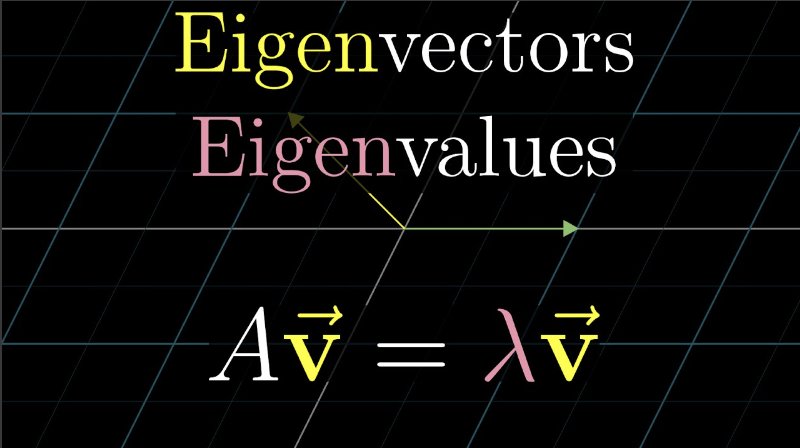
</p>



One can Mathematically calculate the EigenValues and EigenVectors as shown in the illustrations below


<p align="center">
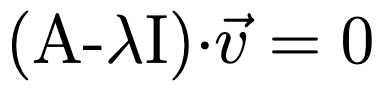
</p>

 if v is a non-zero vector (an eigenvector), for this equation to hold, the matrix (A−λI) must be singular, meaning it has a determinant of zero. This condition arises because a non-zero vector v cannot have a unique solution to (A−λI)v=0 unless the matrix (A−λI) is singular. Basically the Transforamtion associated with that matrix is compressing the space to a lower dimension. **If the determinant were non-zero, the only solution would be v=0, which contradicts the definition of an eigenvector (non-zero)**. So the EigenValues are found using,

 <p align = "center">
 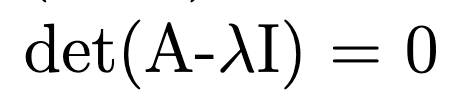
 </p>
 Then use the EigenValues in the earlier equation to solve for EigenVectors.

One of the great and visible applications of this conecpt in the field of Machine Learning is **Principal Component Analysis (PCA)**

### **Principal Component Analysis**

Principal Component Analysis (PCA) is a cornerstone in the field of dimensionality reduction, providing a strong method for unravelling large information. PCA condenses complex information into a more manageable form by identifying the principle components—new dimensions that capture the most variance in the data. Consider a dataset with several properties or features. PCA reorients this data using linear transformations to expose underlying patterns, emphasising the most relevant aspects while minimising information loss.

 Imagine you are planning to buy a house. What do you think would be the key factors that would play a role in determining its price??

  *   Location
  *   Plot Area
  *   Number of floors
  *   Number of Rooms
  *   Accessibility etc.
  *   Number of Plants in the vicinity??

Consider the last factor "Number of Plants in the vicinity", do you think that it plays an as important role in determining the price of the House as the "Plot Area". The answer is obviously No!! Formally, we might want to **look for the factors that capture the most variance in the data** and discard the other factors.

This proves to be extremely helpful in a number of real life scenarios where ML models are applied. Genomic data often contains thousands of genes or genetic markers. PCA assists in uncovering relationships among these. High-resolution photos contain a massive quantity of data in image processing. PCA can be used to reduce image dimensions while keeping the image's essence. In facial recognition systems, for example, PCA assists in extracting the most relevant facial traits while rejecting redundant information, allowing for more efficient storage and processing.

**In a nutshell, Principal Component Analysis is the process of determining the most essential traits or Principal Components that have the greatest influence on the target variable**.




Look at the Illustration below, where we have used the Iris Dataset with 2 classes and applied PCA and found the 2 Principal Components. We can see that the 2 Principal components (red arrows) that capture the most variance in the data.

<p align="center">
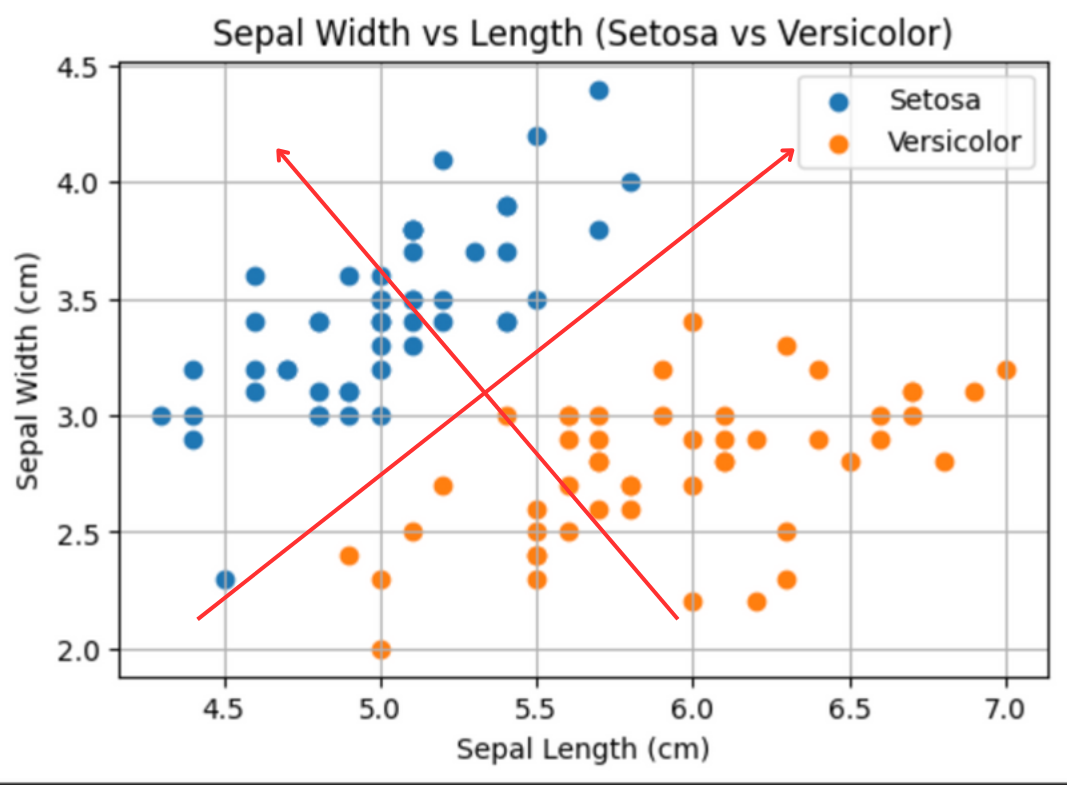
</p>

### **How Exactly do EigenValues and EigenVectors come into Picture??**

Basically **PCA begins by computing the Covariance Matrix**, which represents the relationships between different features. The **EigenValues of this very matrix represent the variance of data along the corresponding EigenVectors**. **Larger eigenvalues correspond to higher variance directions (or principal components) in the data, indicating that these directions capture more information about the dataset**. So, Higher eigenvalues imply greater variance captured by the corresponding principal components.

In practice, the **top-k main components corresponding to the greatest EigenValues are retained to capture the majority of the variance in the data** while minimising dimensionality. **The EigenVectors that correspond to these EigenValues provide a new Basis for the data**.

In the next section, I'll use the Wine dataset to show how eigenvalues, which reveal how much data varies, guide PCA. By exploring this dataset, I'll demonstrate how these values help pick the most important aspects of the data for a clearer, more compact view without losing its key traits.




### **The Wine Dataset**

The Wine dataset is a classic multivariate dataset which describes the chemical analysis of wines grown in same region of Italy but from 3 different Cultivars. **The dataset has 178 samples with 13 attributes or features and 3 target variables**. The 13 attributes are Alcohol, Malic acid, Ash, Alkalinity of ash, Magnesium, Total phenols, Flavanoids, Nonflavanoid phenols, Proanthocyanins, Color intensity, Hue, OD280/OD315 of diluted wines, Proline. The 3 target variable are the class labels 1, 2 and 3.

Without further adeau, lets dive right into the code.


### **PCA on Wine Dataset**

In [38]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA # import PCA
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'svg')
sns.set()

#### Load the data onto a Pandas DataFrame

In [39]:
df = pd.read_csv("/content/drive/MyDrive/Wine.csv")

#### Summary of the Data

In [40]:
df.describe()

,1,14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04,3.92,1065
count,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000
mean,1.943503,12.993672,2.339887,2.366158,19.516949,99.587571,2.292260,2.023446,0.362316,1.586949,5.054802,0.956983,2.604294,745.096045
std,0.773991,0.808808,1.119314,0.275080,3.336071,14.174018,0.626465,0.998658,0.124653,0.571545,2.324446,0.229135,0.705103,314.884046
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.360000,1.600000,2.210000,17.200000,88.000000,1.740000,1.200000,0.270000,1.250000,3.210000,0.780000,1.930000,500.000000
50%,2.000000,13.050000,1.870000,2.360000,19.500000,98.000000,2.350000,2.130000,0.340000,1.550000,4.680000,0.960000,2.780000,672.000000
75%,3.000000,13.670000,3.100000,2.560000,21.500000,107.000000,2.800000,2.860000,0.440000,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


#### Checking for Null Values

In [41]:
df.isnull().sum()

1        0
14.23    0
1.71     0
2.43     0
15.6     0
127      0
2.8      0
3.06     0
.28      0
2.29     0
5.64     0
1.04     0
3.92     0
1065     0
dtype: int64

<Axes: xlabel='1', ylabel='count'>

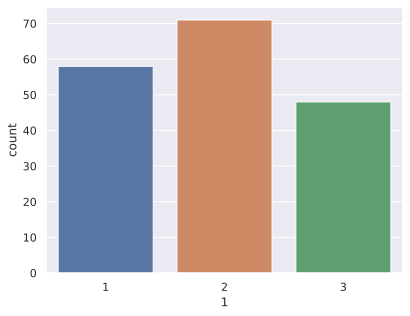

In [42]:
sns.countplot(x = '1',data=df)

#### Dropping the Column '1' as it has the class labels

In [43]:
truth = df['1']
df = df.drop("1",axis=1)

#### Splitting the Data into Training and Testing Data

In [44]:
X_train,X_test,y_train,y_test = train_test_split(df,truth,test_size =0.15,random_state=42)

#### Scaling the data

In [45]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### Training the model

Training a simple Logistic Regression Classifier and evaluating the Performance without PCA. Then we will perform PCA on the data and train the model again and evaluate its performance

In [46]:
classifier = LogisticRegression()
classifier.fit(X_train,y_train)
classifier

LogisticRegression()

#### Now Evaluating the performance of the Classifier

In [47]:
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
print("--------------------------------------------------")
print("Without PCA")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")
print("--------------------------------------------------")

--------------------------------------------------
Without PCA
Accuracy: 0.8518518518518519
Precision: 0.9057239057239057
Recall: 0.8518518518518519
F1-Score: 0.8518518518518519
--------------------------------------------------


#### Now performing PCA on that dataset

The fit() function computes the eigen-decomposition and the transform() functions projects the data into the PCA space. We can implement both together using the fit_transform() function.

In [48]:
PCA_ = PCA()
new_space_train = PCA_.fit_transform(X_train)
new_space_test = PCA_.transform(X_test)

Now, its important to evalaute the proportion of the variance in data captured in the PCA analysis, based on which we will retain the Principal Components.

In [49]:
print(PCA_.explained_variance_ratio_)

[0.35912147 0.19388443 0.11279271 0.07352711 0.06121003 0.05282471
 0.04022546 0.02686909 0.02297152 0.01970328 0.01664666 0.01193983
 0.0082837 ]


**Observe that the top 2 components retain the most variance in the data**.

#### Data Visualisation

Scatter plot of First 2 Principal Components against each other


Text(0, 0.5, 'The second principle component')

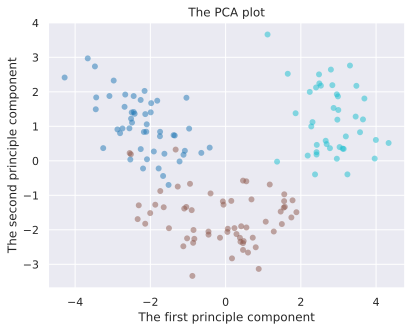

In [50]:
figure = plt.figure()
ax = plt.gca()
plt.scatter(new_space_train[:,0],new_space_train[:,1], c=y_train, edgecolor='none', alpha=0.5,  cmap="tab10")
ax.set_title("The PCA plot")
ax.set_xlabel("The first principle component")
ax.set_ylabel("The second principle component")

The same plot for the test dataset

Text(0, 0.5, 'The second principle component')

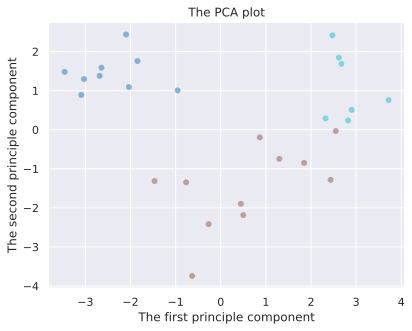

In [51]:
figure = plt.figure()
ax = plt.gca()
plt.scatter(new_space_test[:,0],new_space_test[:,1], c=y_test, edgecolor='none', alpha=0.5,  cmap="tab10")
ax.set_title("The PCA plot")
ax.set_xlabel("The first principle component")
ax.set_ylabel("The second principle component")

**It is pretty evident from the plots that the top 2 Principal Compenents do a good job in capturing most of the variance in the data**

#### PCA with top 2 Principal Componenents

In [52]:
PCA2_ = PCA(n_components=2)
top_2_train = PCA2_.fit_transform(X_train)
top_2_test = PCA2_.transform(X_test)

#### Evaluate the model on the Transformed Data
Now lets train the classifier on this new transformed dataset and evaluate the performance

In [53]:
new_classifier = LogisticRegression()
new_classifier.fit(top_2_train,y_train)
new_classifier

LogisticRegression()

In [54]:
new_y_pred = new_classifier.predict(top_2_test)
accuracy = accuracy_score(y_test, new_y_pred)
precision = precision_score(y_test, new_y_pred, average='weighted')
recall = recall_score(y_test, new_y_pred, average='weighted')
f1 = f1_score(y_test, new_y_pred, average='weighted')
print("--------------------------------------------------")
print("PCA with top 2 components")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")
print("--------------------------------------------------")

--------------------------------------------------
PCA with top 2 components
Accuracy: 0.9629629629629629
Precision: 0.9675925925925926
Recall: 0.9629629629629629
F1-Score: 0.9633156966490298
--------------------------------------------------


#### **Performance Comparison**
Compare the performance of the Logistic Regression Classifier with and without PCA.
<p align="center">
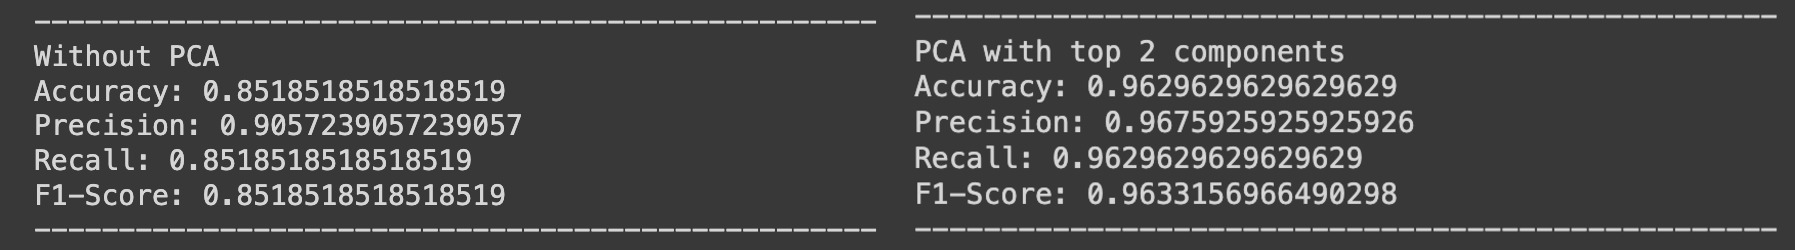
</p>

**Clearly the model performs better when PCA with top 2 components is employed**

### **Drawbacks of PCA**

One of the drawbacks of Principal Component analysis is the potential **loss of Interpretability**. As PCA transforms the original features into a set of Orthogonal Components which might not directly correspond to the original features, as a result interpretablity is lost.

Moreover, **PCA is based on the assumption of linear connections between variables**, which may not be true for complicated, non-linear datasets. Furthermore, because **PCA prioritises variance maximisation**, it may not always capture the most useful characteristics for specific tasks, thus rejecting complex but relevant data.
